Nama : Arif Muhammad Laduni

Nim : 1103213003

Lecture 6 : K-Means Clustering

Dataset : Mall_Customers

Dokumentasi ChatGPT : [ChatGPT](https://chat.openai.com/c/d6f1da17-1660-4b7b-b7c8-c7cc606760e7)

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# Exploratory Data Analysis

In [2]:
import pandas as pd

# Lokasi file CSV di Google Drive
file_path = '/content/drive/My Drive/Dataset/Mall_Customers.csv'

# Membaca file CSV dan membuat dataframe
df = pd.read_csv(file_path)
# Menampilkan lima baris pertama dataframe
print(df.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



# Preprocessing

In [4]:
df.rename(columns={'Genre': 'Gender'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Modelling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
0          1  
1          1  
2          1  
3          1  
4          1

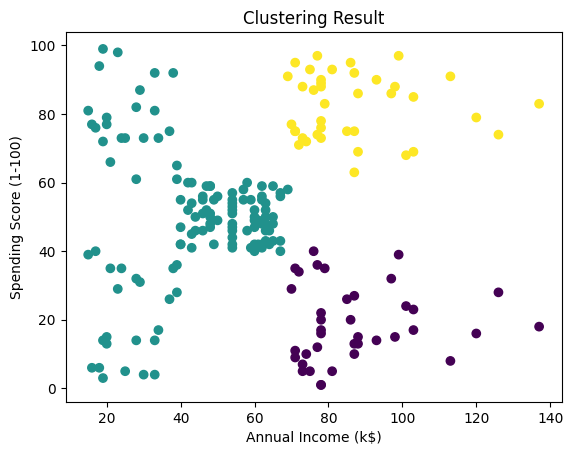

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Pilih fitur yang akan digunakan untuk clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Membuat model KMeans dengan 3 klaster
kmeans = KMeans(n_clusters=3, random_state=42)

# Melakukan clustering
kmeans.fit(X)

# Menambahkan kolom klaster ke dalam dataframe
df['Cluster'] = kmeans.labels_

# Menampilkan hasil clustering
print(df)

# Visualisasi hasil clustering
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering Result')
plt.show()

In [13]:
from sklearn.cluster import KMeans

# Membuat model KMeans dengan 5 klaster
kmeans_5 = KMeans(n_clusters=5, random_state=42)

# Melakukan clustering
kmeans_5.fit(X)

# Menambahkan kolom klaster ke dalam dataframe
df['Cluster_5'] = kmeans_5.labels_

# Menampilkan hasil clustering
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_5
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,1
196,197,Female,45,126,28,0,2
197,198,Male,32,126,74,2,1
198,199,Male,32,137,18,0,2


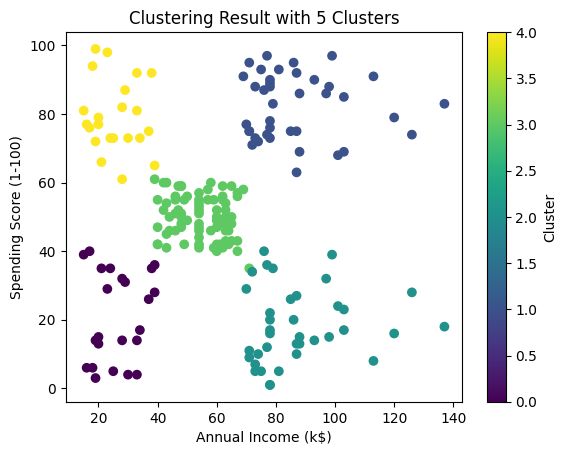

In [15]:
# Visualisasi hasil clustering dengan 5 klaster
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster_5'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering Result with 5 Clusters')
plt.colorbar(label='Cluster')
plt.show()

In [16]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Menghitung inertia
inertia = kmeans.inertia_
print("Inertia:", inertia)

# Menghitung silhouette score
silhouette = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette)

# Menghitung Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, kmeans.labels_)
print("Davies-Bouldin Index:", davies_bouldin)

Inertia: 143342.751571706
Silhouette Score: 0.3839349967742105
Davies-Bouldin Index: 0.8748062648492879
